In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [36]:
# create data frames to read data set
df = pd.read_csv(r'D:\ml projects\gold_price_prediction\gld_price_data.csv')

In [9]:
df.head() #start 5 drows of dataset

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [10]:
df.tail() # end 5 row of dataset

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [37]:
# check the df structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [12]:
#find no of rows and colums
df.shape

(2290, 6)

In [38]:
# statical measures insights of data
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [50]:
# Remove missing values if any
df.dropna()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [51]:

# Verify dataset after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


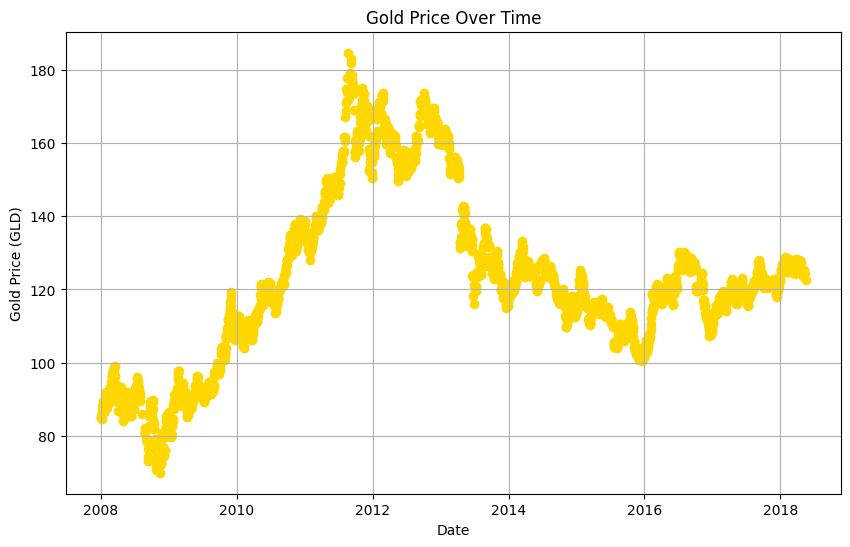

In [52]:
# Ensure date is in the correct format (if applicable)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df= df.sort_values('Date')

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['GLD'], color='gold', marker='o')
plt.title("Gold Price Over Time")
plt.xlabel("Date")
plt.ylabel("Gold Price (GLD)")
plt.grid(True)
plt.show()


In [ ]:
# describe df numerical columns : statical measures insights of data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [14]:
# find the unique values from categorical features
for col in df.select_dtypes(include=['object']):
  print(col,df[col].unique())

Date ['1/2/2008' '1/3/2008' '1/4/2008' ... '5/10/2018' '5/14/2018' '5/16/2018']


In [15]:
# find Missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for features in features_na:
  print(features,np.round(df[features].isnull().mean(),4), ' % missing values')
else:
  print('no missing values')

no missing values


In [16]:
for column in df.columns:
  print(column,df[column].nunique())

Date 2290
SPX 2277
GLD 1930
USO 1514
SLV 1331
EUR/USD 2066


In [17]:
categorical_features = [features for features in df.columns if df[features].dtype == 'O']
categorical_features

['Date']

In [18]:
for feature in categorical_features:
  print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Date and number of categories are 2290


In [19]:
# List of numerical data
numerical_features = [features for features in df.columns if ((df[features].dtype != 'O') & (feature not in ['GLD']))]
print('number of numerial variables: ',len(numerical_features))

number of numerial variables:  5


In [20]:
discreate_features = [features for features in numerical_features if len(df[features].unique()) < 25]
print('number of discreate variables: ',len(discreate_features))

number of discreate variables:  0


In [21]:
continious_features = [features for features in numerical_features if features not in discreate_features]
print('number of continious variables: ',len(continious_features))

number of continious variables:  5


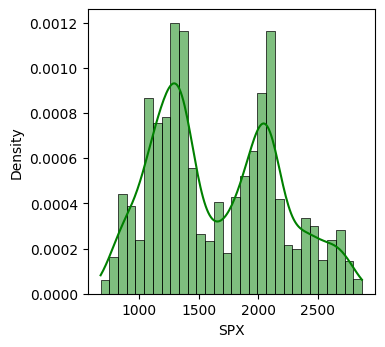

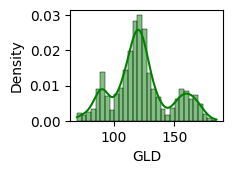

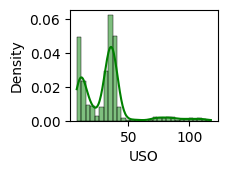

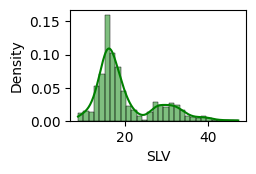

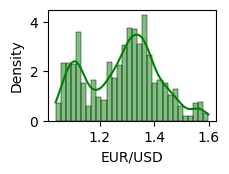

In [23]:
# plot a univariate distribution of continious observation
plt.figure(figsize=(10,10))
for i,features in enumerate(continious_features):
  plt.subplot(3,3,i+1)
  sns.histplot(df[features], bins=30, kde=True, color='green', edgecolor='black', stat='density')
  plt.xlabel(features)
  plt.tight_layout()
  plt.show()

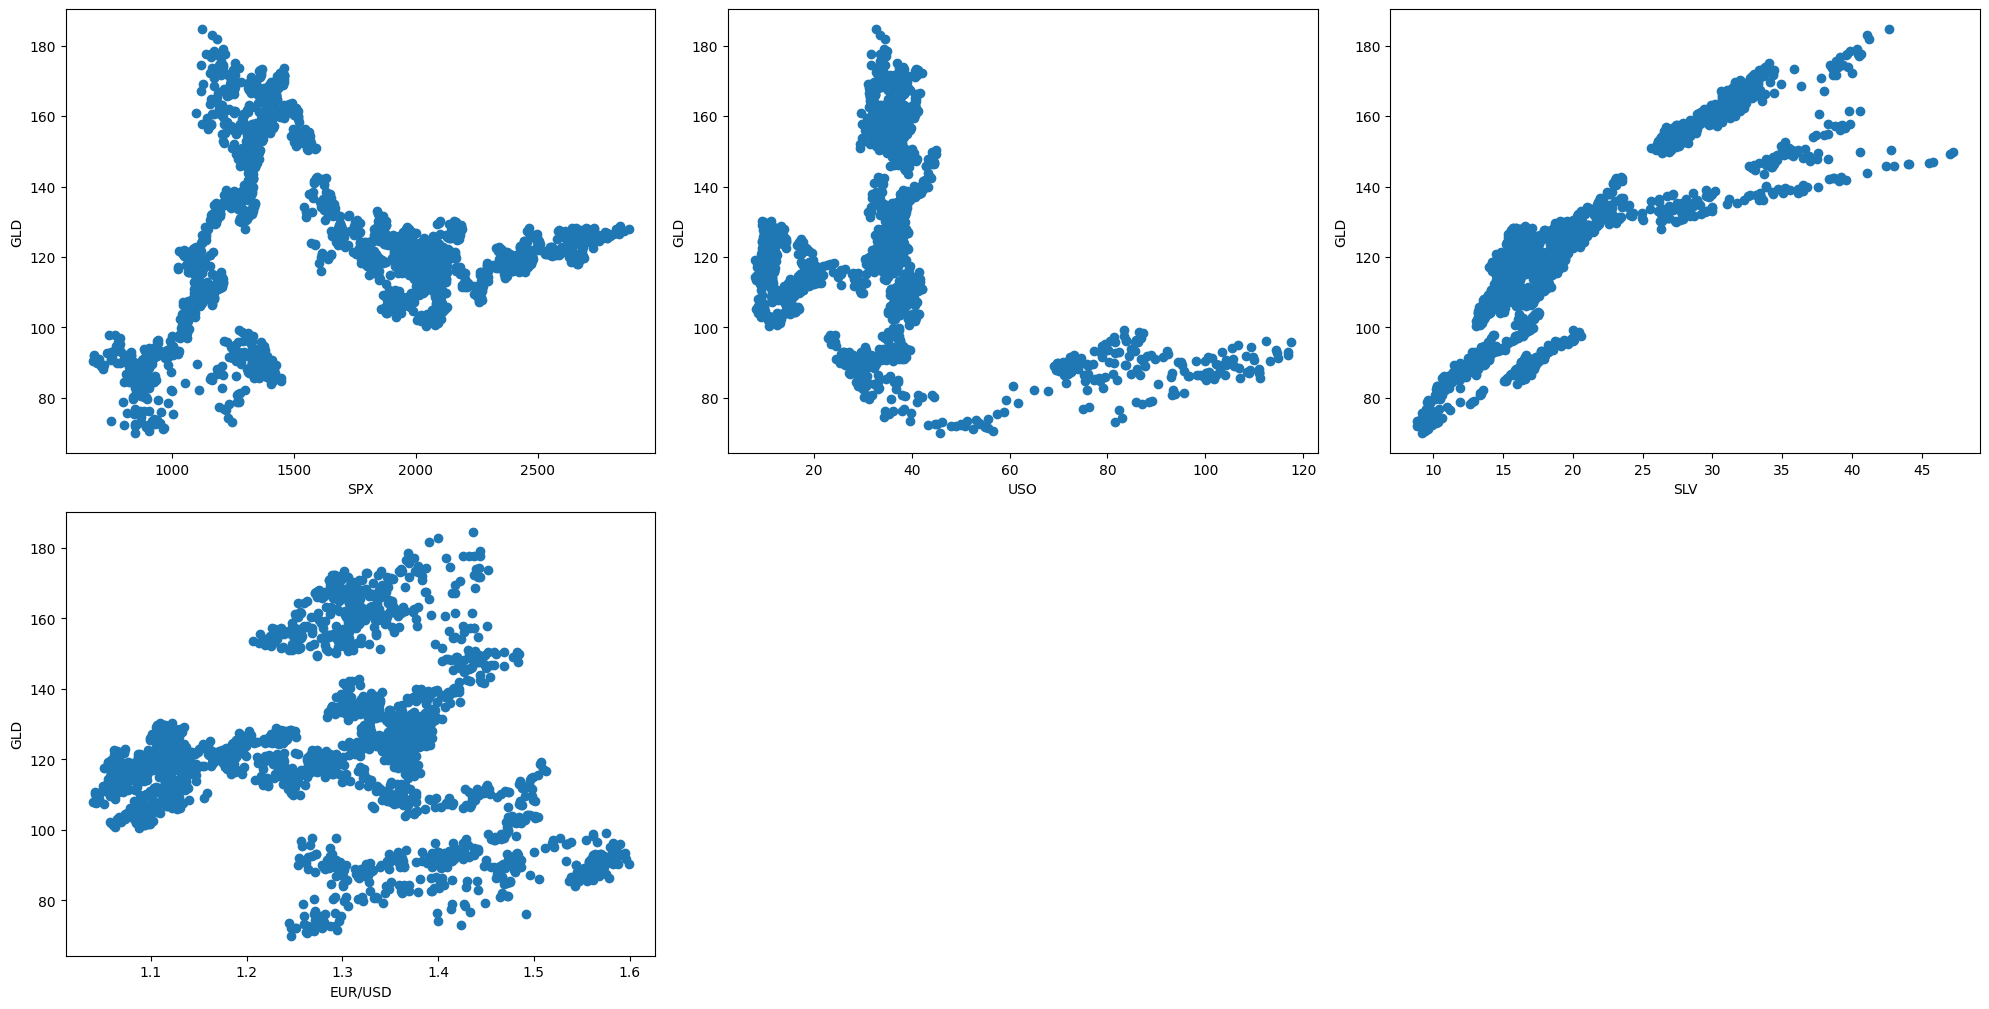

In [24]:
numerical_features = [col for col in df.columns if df[col].dtype != 'O' and col != 'GLD']
discrete_features = [col for col in numerical_features if len(df[col].unique()) < 25]
continuous_features = [col for col in numerical_features if col not in discrete_features]

# Scatter plots with 'GLD'

plt.figure(figsize=(20, 60))
plotnumber = 1

for feature in continuous_features:
    if df[feature].isnull().any() or df['GLD'].isnull().any():
        print(f"Skipping {feature} due to missing values.")
        continue
    ax = plt.subplot(12, 3, plotnumber)
    plt.scatter(df[feature], df['GLD'])
    plt.xlabel(feature)
    plt.ylabel('GLD')
    plotnumber += 1

plt.tight_layout()
plt.show()

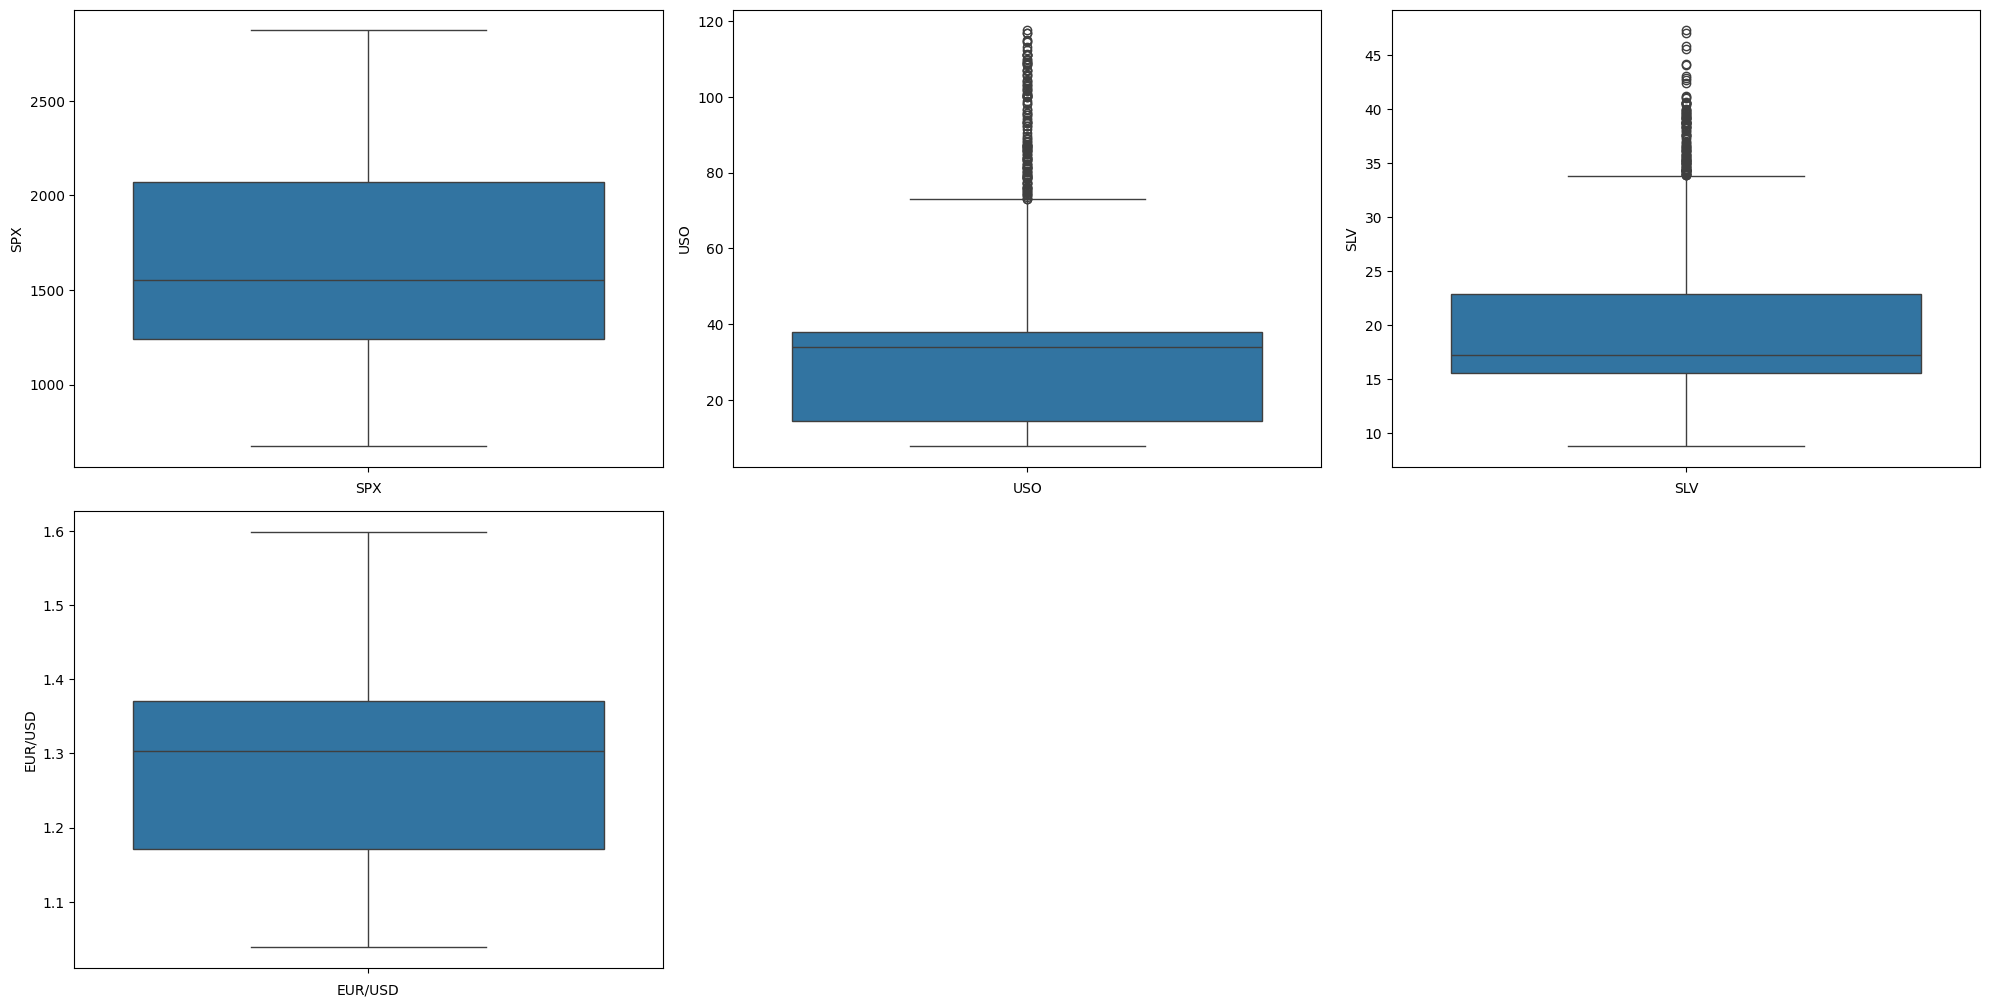

In [25]:
# boxplot on numerical features to find outliers
plt.figure(figsize=(20, 60),facecolor='white')
plotnumber = 1

for feature in numerical_features:
    if df[feature].isnull().any():
        print(f"Skipping {feature} due to missing values.")
        continue
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[feature])
    plt.xlabel(feature)
    plotnumber += 1

plt.tight_layout()
plt.show()

<Axes: >

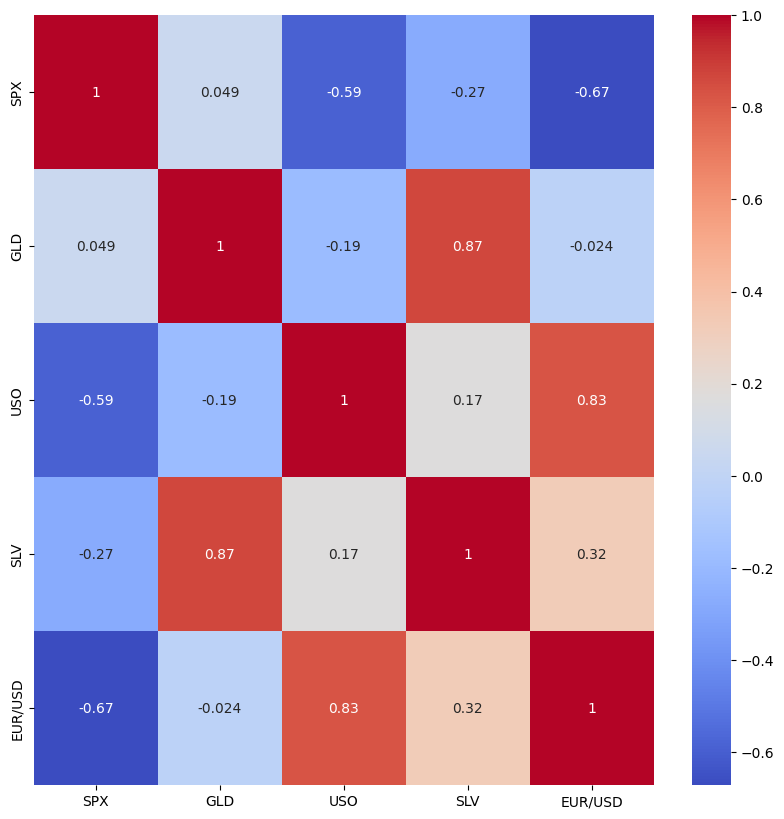

In [26]:
# check corelation with heatmap
plt.figure(figsize = (10,10))
sns.heatmap(df[continious_features].corr(),annot=True,cmap='coolwarm')

In [27]:
# Compute correlation matrix
correlation_matrix = df[continious_features].corr()

# Sort the correlations with respect to 'GLD'
sorted_correlations = correlation_matrix['GLD'].sort_values(ascending=False)

print(sorted_correlations)


GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64


FEATURE ENFINEERING

In [28]:
# Copying dataframes to new dataframes
df2 =df.copy()

In [29]:
df2.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [30]:
df2.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [31]:
# Drop data
df2.drop(['Date'],axis=1,inplace=True)

Splitting dataset into training and test data in 80:20 ratio.

In [33]:
x = df2.drop(['GLD'],axis=1)
y = df2['GLD']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [34]:
len(x_train)

1832

In [32]:
len(x_test)

458

In [55]:
x_train

,SPX,USO,SLV,EUR/USD
476,1138.500000,39.790001,16.889999,1.361693
1958,2202.939941,10.630000,15.800000,1.063886
248,700.820007,24.480000,12.770000,1.256408
2231,2656.000000,11.890000,15.570000,1.225280
1325,1838.880005,33.040001,19.420000,1.366998
...,...,...,...,...
1071,1409.150024,32.320000,32.980000,1.287515
433,1132.989990,40.270000,17.230000,1.442398
674,1286.119995,38.610001,27.389999,1.357276
1099,1461.890015,33.919998,29.180000,1.306745


In [56]:
# Algorithms
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# Model selection techniques
from sklearn.model_selection import ShuffleSplit, GridSearchCV


In [60]:
def find_est_model_using_gridsearchcv(x, y):
    algos = {
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],   #random parameter values and below
                'splitter': ['best', 'random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 50, 100, 130],        #random parameter values and below
                'criterion': ['squared_error'],
                'max_depth': range(2, 4),
                'max_features': ['sqrt', 'log2', None]
            }
        },
        'xgboost': {
            'model': XGBRegressor(),
            'params': {
                'learning_rate': [0.5, 0.1, 0.01, 0.001],      #random parameter values and below
                'max_depth': [2, 3],
                'n_estimators': [10, 50, 100, 200]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Applying model selection technique using gridSearchCV
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

        # Storing best score and best patameters

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [61]:
pd.set_option('display.max_colwidth', 100)
find_est_model_using_gridsearchcv(x, y)  # Ensure the function name matches



,model,best_score,best_params
0,decision_tree,0.981770,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
1,random_forest,0.909512,"{'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 50}"
2,xgboost,0.987293,"{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200}"


In [62]:
# Initialise the model
xg_model = XGBRegressor(learning_rate=0.5,max_depth=3,n_estimators=200)

In [63]:
xg_model.fit(x_train,y_train) #fror trainig the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [64]:
# finding score of the model
xg_model.score(x_test,y_test)

0.9847685874275643

In [65]:
#predicting thetest set
y_pred = xg_model.predict(x_test)

In [66]:
# predicted values
y_pred

array([169.24257 ,  82.672554, 115.83291 , 128.7338  , 120.68981 ,
       154.95808 , 150.11508 , 126.65612 , 118.40361 , 126.54028 ,
       115.1857  , 169.82155 , 143.76407 , 167.59834 , 116.182556,
       117.74236 , 137.40239 , 168.32079 , 152.55399 , 155.06413 ,
       156.63826 , 125.593636, 178.99747 , 154.66133 , 124.99562 ,
        95.903786,  73.64956 , 120.92895 , 118.98776 , 167.34872 ,
        87.25074 , 122.951256,  90.43017 , 118.52989 , 121.018364,
       138.4679  , 117.33224 , 114.77964 , 141.40999 , 107.5196  ,
       103.71184 ,  87.34779 , 126.33884 , 117.69657 , 155.69818 ,
       119.98044 , 109.26743 , 107.005974,  92.278465, 126.72903 ,
        74.26297 , 113.08902 , 121.10449 , 111.86181 , 118.81148 ,
       118.675804, 155.00035 , 170.60814 , 146.32542 ,  87.15864 ,
        95.35684 ,  87.34872 ,  90.2336  , 117.43808 , 126.92605 ,
       125.933266, 159.85771 , 122.26094 , 117.71072 ,  98.32712 ,
       168.02637 , 142.26883 , 135.69528 , 119.52772 , 122.952

In [67]:
# Actual values
y_test

903     168.020004
129      81.230003
1787    112.320000
1913    127.589996
2048    119.620003
           ...    
923     166.380005
1693    106.379997
2054    122.239998
658     133.830002
376     102.360001
Name: GLD, Length: 458, dtype: float64

Taking Randomforest regressor

In [ ]:
# splitting features and targets
X = df.drop(['Date','GLD'],axis=1)
Y = df['GLD']

In [40]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [41]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [43]:
regressor = RandomForestRegressor(n_estimators=100)

In [44]:
# training the model
regressor.fit(X_train,Y_train)
RandomForestRegressor()

RandomForestRegressor()

In [45]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [46]:
print(test_data_prediction)

[168.58329987  82.15889966 116.1506002  127.56890062 120.60350135
 154.96039792 150.23459835 126.18070028 117.58609873 126.0605007
 116.56660079 170.92180111 141.68279897 167.82649854 115.32909979
 117.65590069 138.25670312 170.14730064 159.22990228 161.17619953
 155.18820029 125.29569991 175.80859946 157.20880359 125.20080029
  93.47339937  77.78530028 120.58769982 119.17029942 167.52329976
  88.16270014 125.60020038  91.14590093 117.63150022 121.07139911
 135.79190039 115.39860111 115.01920082 149.04929915 107.30960118
 104.33750257  87.29519805 126.46220034 117.71359946 153.12579849
 119.51140018 108.26740046 108.29739865  93.16400054 127.10709783
  74.83560037 113.65049919 121.47600019 111.35889908 118.87549903
 121.17169943 159.03289999 168.56470186 147.04119674  85.76089846
  94.23540028  86.79019872  90.53760035 118.97110066 126.39140088
 127.58319961 169.46880072 122.22209911 117.10439903  98.84100032
 168.60160069 143.0781983  131.44260242 121.1971025  121.08749906
 119.715300

In [47]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R_squared error : ", error_score)

R_squared error :  0.9890503497723073


In [48]:
Y_test = list(Y_test)

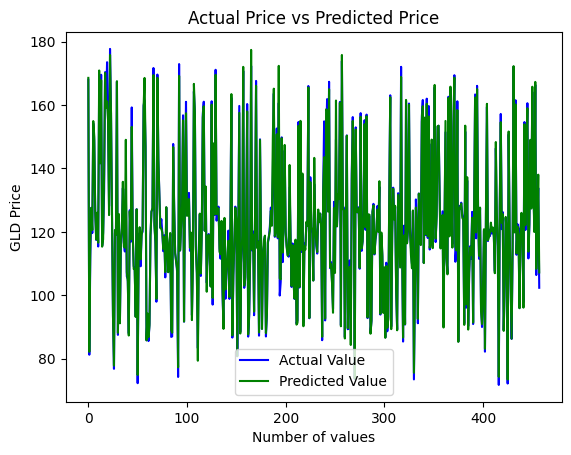

In [49]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

Using line olot for comparison for actual and predicted values

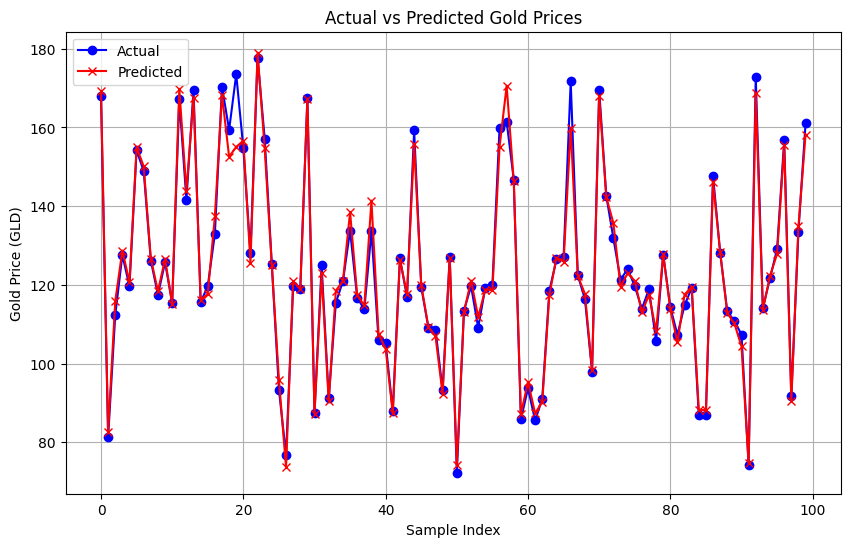

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label='Actual', color='blue', marker='o')
plt.plot(y_pred[:100], label='Predicted', color='red', marker='x')
plt.title("Actual vs Predicted Gold Prices")
plt.xlabel("Sample Index")
plt.ylabel("Gold Price (GLD)")
plt.legend()
plt.grid(True)
plt.show()


using Linear Regression for comaparision

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

# Training
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# predict
linear_y_pred = linear_model.predict(X_test)

# evaluating
print("Linear Regression - Mean Absolute Error (MAE):", mean_absolute_error(y_test, linear_y_pred))
print("Linear Regression - Mean Squared Error (MSE):", mean_squared_error(y_test, linear_y_pred))
print("Linear Regression - Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, linear_y_pred)))


Linear Regression - Mean Absolute Error (MAE): 5.911486735777764
Linear Regression - Mean Squared Error (MSE): 70.78890079721528
Linear Regression - Root Mean Squared Error (RMSE): 8.41361401522647


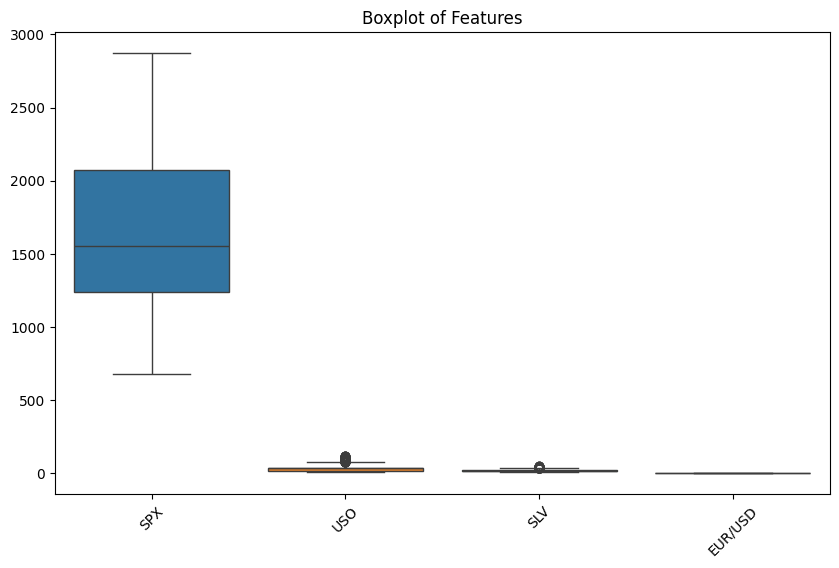

In [72]:
# Boxplot to Check Outliers in Features
plt.figure(figsize=(10, 6))
sns.boxplot(data=X)
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()

In [74]:
# Standardization of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standarad_scaler = scaler.fit_transform(X)
standarad_scaler

array([[-0.39914541,  2.38880956, -0.6917197 ,  1.42975293],
       [-0.39914541,  2.38368652, -0.67691224,  1.45103511],
       [-0.46760428,  2.32938091, -0.69355301,  1.45864621],
       ...,
       [ 2.05926403, -0.89307824, -0.61274655, -0.69876145],
       [ 2.0728668 , -0.89461519, -0.63813078, -0.68838269],
       [ 2.06448555, -0.89329341, -0.65305106, -0.77266741]])

In [79]:
from sklearn.preprocessing import StandardScaler
def predict_gold_price(new_data):

    # Convert the new data to a NumPy array and reshape for a single prediction
    new_data = np.array(new_data).reshape(1, -1)
    
    # Standardize the input data using the fitted scaler
    new_data_scaled = scaler.transform(new_data)
    
    # Predict the gold price using the trained regressor
    predicted_price = regressor.predict(new_data_scaled)
    
    return predicted_price[0]  # Return the predicted gold price

# Example usage 
new_input = [1447.160034  ,78.470001 , 15.1800 , 1.471692]  
predicted_price = predict_gold_price(new_input)

print(f"Predicted Gold Price: {predicted_price:.2f}")

Predicted Gold Price: 77.62


C:\Users\ashut\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ashut\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [81]:
import pickle

# Save the trained model
with open('gold_price_model.pkl', 'wb') as model_file:
    pickle.dump(regressor, model_file)

# Save the scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


In [82]:
# Load the model
with open('gold_price_model.pkl', 'rb') as model_file:
    regressor = pickle.load(model_file)

# Load the scaler
with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)


In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import pickle

# Example: Train a model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
regressor = RandomForestRegressor()
regressor.fit(X_scaled, y)

# Save the model and scaler
with open('gold_price_model.pkl', 'wb') as model_file:
    pickle.dump(regressor, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
